In [5]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from msml.utils.io import wandb_import
from msml.utils.plots import get_nature_hex_colors
from msml.utils.plots import save_fig
palette = get_nature_hex_colors()

In [2]:
val_dfs, cfgs = wandb_import(project_name='SSL_VAL_4.0', entity_name='mass-spec-ml', run_name_suffix='V7')
len(val_dfs)

100%|██████████| 77/77 [05:06<00:00,  3.98s/it]


48

In [3]:
df_res = []
for i, df_val in tqdm(enumerate(val_dfs)):
    run_name = cfgs['run_name'][i]
    if '[TODO]' in run_name:
        continue

    for metric in [
        '[NIST20] Cos corr mean',
        '[NIST20] Eucl corr mean',
        '[NIST20] Cos corr std',
        '[NIST20] Eucl corr std'
    ]:
        df_res.append({
            'run_name': run_name,
            'metric': metric,
            'value': min(df_val[metric]) if metric in df_val.columns else np.nan
        })
df_res = pd.DataFrame(df_res)
df_res['value'] = df_res['value'].astype(float)
df_res

48it [00:00, 2200.63it/s]


,run_name,metric,value
0,QYJVzntHQL_V7_MoNA_1device_on_train_epoch_end_...,[NIST20] Cos corr mean,NaN
1,QYJVzntHQL_V7_MoNA_1device_on_train_epoch_end_...,[NIST20] Eucl corr mean,NaN
2,QYJVzntHQL_V7_MoNA_1device_on_train_epoch_end_...,[NIST20] Cos corr std,NaN
3,QYJVzntHQL_V7_MoNA_1device_on_train_epoch_end_...,[NIST20] Eucl corr std,NaN
4,mKYQ2QuYp8_V7_d_mz_token980_hot_mz_bin_size0.1,[NIST20] Cos corr mean,-0.577919
...,...,...,...
187,uGqgu7FgUE_V7_ff_peak_depth2,[NIST20] Eucl corr std,NaN
188,CtDh6OHlhA_V7_ff_peak_depth1,[NIST20] Cos corr mean,NaN
189,CtDh6OHlhA_V7_ff_peak_depth1,[NIST20] Eucl corr mean,NaN
190,CtDh6OHlhA_V7_ff_peak_depth1,[NIST20] Cos corr std,NaN


10


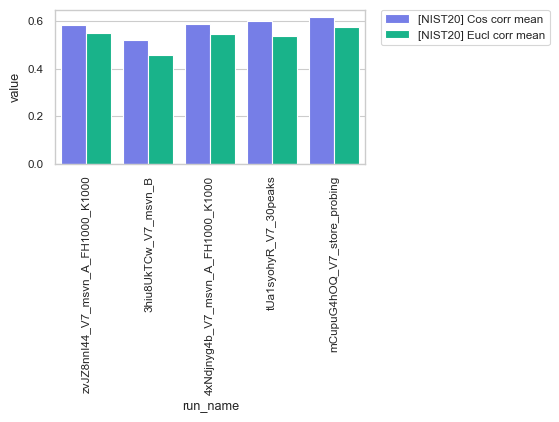

In [89]:
df_plot = df_res[df_res['run_name'].apply(lambda x: 'msvn' in x or x == 'mCupuG4hOQ_V7_store_probing' or x == 'tUa1syohyR_V7_30peaks')]
df_plot = df_plot[df_plot['metric'].apply(lambda x: 'std' not in x)]
df_plot['value'] = -df_plot['value'].astype(float)
print(len(df_plot))
plt.figure(figsize=(4, 2))
sns.barplot(data=df_plot, x='run_name', y='value', hue='metric')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

94


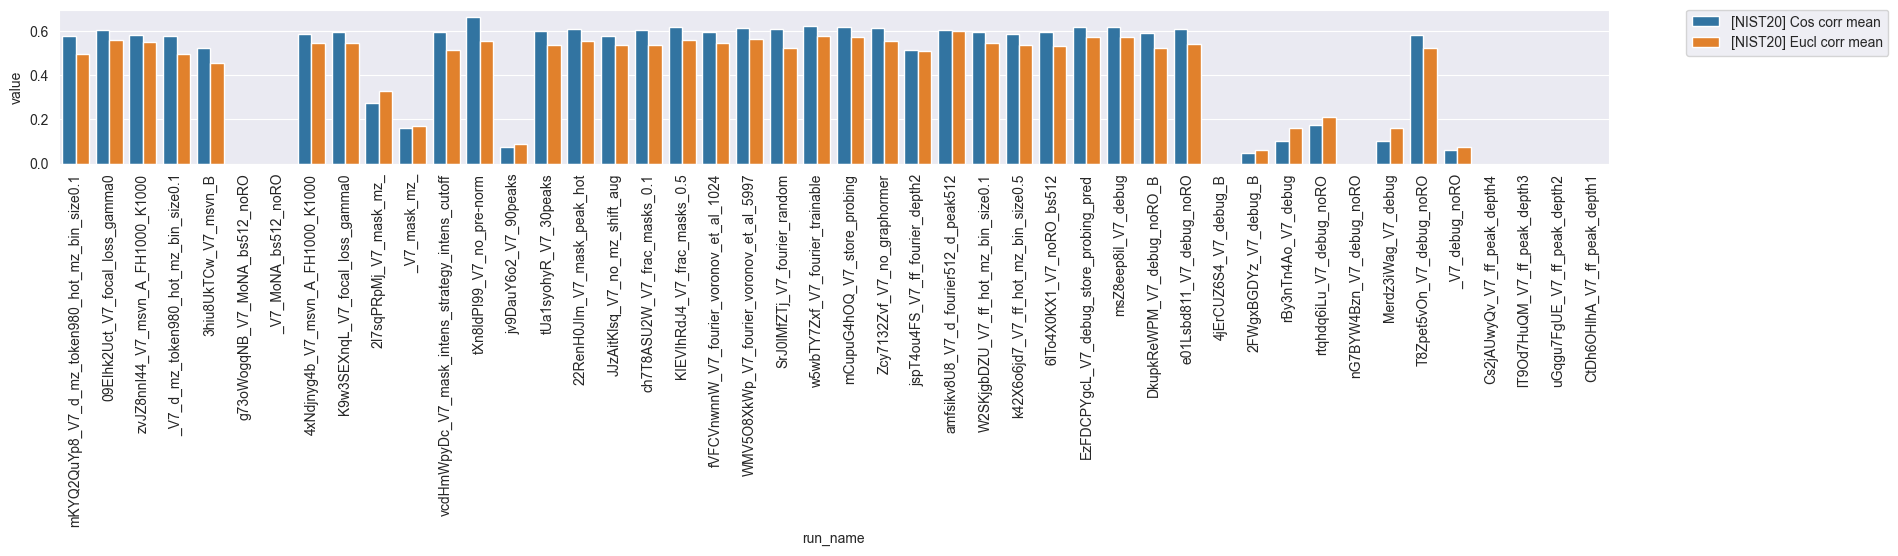

In [14]:
# df_plot = df_res[df_res['run_name'].apply(lambda x: 'msvn' in x or x == 'mCupuG4hOQ_V7_store_probing')]
df_plot = df_res.copy()
df_plot['value'] = -df_plot['value'].astype(float)
print(len(df_plot))
plt.figure(figsize=(20, 2))
sns.barplot(data=df_plot, x='run_name', y='value', hue='metric')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [71]:
df_res[df_res['run_name'].apply(lambda x: 'msvn' in x or x == 'mCupuG4hOQ_V7_store_probing' or x == 'tUa1syohyR_V7_30peaks')]['run_name'].unique()

array(['zvJZ8nnI44_V7_msvn_A_FH1000_K1000', '3hiu8UkTCw_V7_msvn_B',
       '4xNdjnyg4b_V7_msvn_A_FH1000_K1000', 'tUa1syohyR_V7_30peaks',
       'mCupuG4hOQ_V7_store_probing'], dtype=object)

16


/var/folders/73/x57b4d9x09qbcqjjd5ccz_6r0000gn/T/ipykernel_4122/1804934708.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot_mean['value'] = -df_plot_mean['value'].astype(float)
/var/folders/73/x57b4d9x09qbcqjjd5ccz_6r0000gn/T/ipykernel_4122/1804934708.py:18: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  ax = sns.barplot(data=df_plot_mean, x='label', y='value', hue='metric', palette=palette)


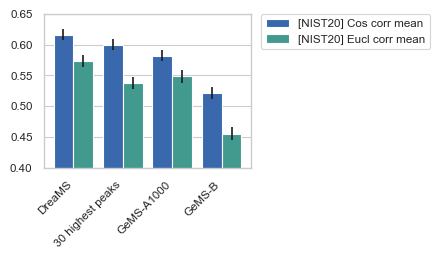

In [107]:
runs = {
    'zvJZ8nnI44_V7_msvn_A_FH1000_K1000': 'GeMS-A1000',
    '3hiu8UkTCw_V7_msvn_B': 'GeMS-B',
    # '4xNdjnyg4b_V7_msvn_A_FH1000_K1000': 'GeMS-A1000',
    'tUa1syohyR_V7_30peaks': '30 highest peaks',
    'mCupuG4hOQ_V7_store_probing': 'DreaMS',
}
# df_plot = df_res[df_res['run_name'].apply(lambda x: 'msvn' in x or x == 'mCupuG4hOQ_V7_store_probing')]
df_plot = df_res[df_res['run_name'].isin(runs.keys())].copy()
df_plot['label'] = df_plot['run_name'].apply(lambda x: runs[x])
df_plot = df_plot.sort_values(by='value', ascending=True)
df_plot_mean = df_plot[df_plot['metric'].apply(lambda x: 'mean' in x)]
df_plot_mean['value'] = -df_plot_mean['value'].astype(float)
df_plot_std = df_plot[df_plot['metric'].apply(lambda x: 'std' in x)]
print(len(df_plot))
plt.figure(figsize=((6 / 9) * 4, 2))
ax = sns.barplot(data=df_plot_mean, x='label', y='value', hue='metric', palette=palette)
x_coords = [p.get_x() + 0.5 * p.get_width() for p in ax.patches]
y_coords = [p.get_height() for p in ax.patches]
ax.errorbar(x=x_coords[:-2], y=y_coords[:-2], yerr=df_plot_std["value"].tolist(), fmt="none", c="k")
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim(0.4, 0.65)
plt.ylabel('')
plt.xlabel('')
save_fig('ablations_data.svg')
plt.show()

In [99]:
x_coords

[-0.2,
 0.8,
 1.8,
 2.8,
 0.20000000000000007,
 1.2000000000000002,
 2.2,
 3.2,
 0.0,
 0.0]

In [97]:
len(y_coords)

10

In [93]:
df_plot_std

,run_name,metric,value,label
94,mCupuG4hOQ_V7_store_probing,[NIST20] Cos corr std,0.008807,DreaMS
58,tUa1syohyR_V7_30peaks,[NIST20] Cos corr std,0.009218,30 highest peaks
95,mCupuG4hOQ_V7_store_probing,[NIST20] Eucl corr std,0.009390,DreaMS
18,3hiu8UkTCw_V7_msvn_B,[NIST20] Cos corr std,0.009581,GeMS-B
10,zvJZ8nnI44_V7_msvn_A_FH1000_K1000,[NIST20] Cos corr std,0.009652,GeMS-A1000
11,zvJZ8nnI44_V7_msvn_A_FH1000_K1000,[NIST20] Eucl corr std,0.010145,GeMS-A1000
59,tUa1syohyR_V7_30peaks,[NIST20] Eucl corr std,0.010310,30 highest peaks
19,3hiu8UkTCw_V7_msvn_B,[NIST20] Eucl corr std,0.010618,GeMS-B


28


/var/folders/73/x57b4d9x09qbcqjjd5ccz_6r0000gn/T/ipykernel_1415/746746707.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot_mean['value'] = -df_plot_mean['value'].astype(float)
/var/folders/73/x57b4d9x09qbcqjjd5ccz_6r0000gn/T/ipykernel_1415/746746707.py:21: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  ax = sns.barplot(data=df_plot_mean, x='label', y='value', hue='metric', palette=palette)


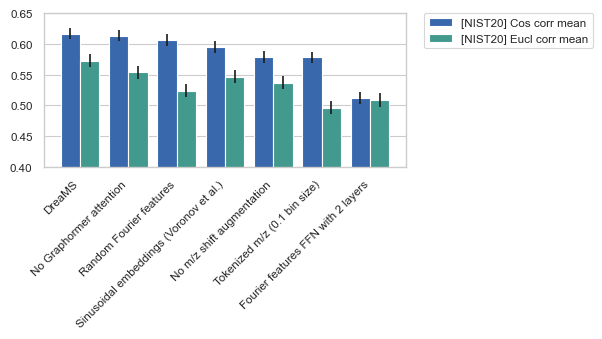

In [9]:
from msml.utils.plots import init_plotting
init_plotting()
runs = {
    'mCupuG4hOQ_V7_store_probing': 'DreaMS',
    'mKYQ2QuYp8_V7_d_mz_token980_hot_mz_bin_size0.1': 'Tokenized m/z (0.1 bin size)',
    'fVFCVnwnnW_V7_fourier_voronov_et_al_1024': 'Sinusoidal embeddings (Voronov et al.)',
    'SrJ0lMfZTj_V7_fourier_random': 'Random Fourier features',
    'jspT4ou4FS_V7_ff_fourier_depth2': 'Fourier features FFN with 2 layers',
    'JJzAitKlsq_V7_no_mz_shift_aug': 'No m/z shift augmentation',
    'Zcy7132Zvf_V7_no_graphormer': 'No Graphormer attention'
}
# df_plot = df_res[df_res['run_name'].apply(lambda x: 'msvn' in x or x == 'mCupuG4hOQ_V7_store_probing')]
df_plot = df_res[df_res['run_name'].isin(runs.keys())].copy()
df_plot['label'] = df_plot['run_name'].apply(lambda x: runs[x])
df_plot = df_plot.sort_values(by='value', ascending=True)
df_plot_mean = df_plot[df_plot['metric'].apply(lambda x: 'mean' in x)]
df_plot_mean['value'] = -df_plot_mean['value'].astype(float)
df_plot_std = df_plot[df_plot['metric'].apply(lambda x: 'std' in x)]
print(len(df_plot))
plt.figure(figsize=((6 / 9) * len(runs.keys()), 2))
ax = sns.barplot(data=df_plot_mean, x='label', y='value', hue='metric', palette=palette)
x_coords = [p.get_x() + 0.5 * p.get_width() for p in ax.patches]
y_coords = [p.get_height() for p in ax.patches]
ax.errorbar(x=x_coords[:-2], y=y_coords[:-2], yerr=df_plot_std["value"].tolist(), fmt="none", c="k")
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim(0.4, 0.65)
plt.ylabel('')
plt.xlabel('')
save_fig('ablations_architecture.svg')
plt.show()

24


/var/folders/73/x57b4d9x09qbcqjjd5ccz_6r0000gn/T/ipykernel_4122/2219107367.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot_mean['value'] = -df_plot_mean['value'].astype(float)
/var/folders/73/x57b4d9x09qbcqjjd5ccz_6r0000gn/T/ipykernel_4122/2219107367.py:21: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  ax = sns.barplot(data=df_plot_mean, x='label', y='value', hue='metric', palette=palette)


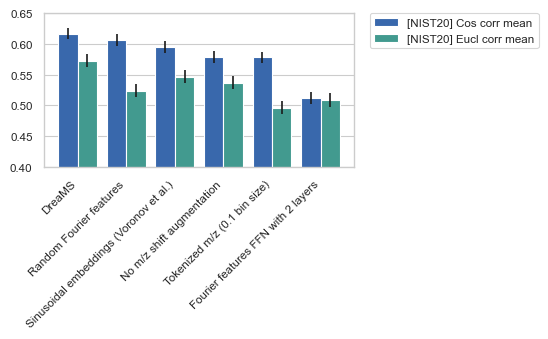

In [106]:
from msml.utils.plots import init_plotting
runs = {
    'mCupuG4hOQ_V7_store_probing': 'DreaMS',
    'mKYQ2QuYp8_V7_d_mz_token980_hot_mz_bin_size0.1': 'Tokenized m/z (0.1 bin size)',
    'fVFCVnwnnW_V7_fourier_voronov_et_al_1024': 'Sinusoidal embeddings (Voronov et al.)',
    'SrJ0lMfZTj_V7_fourier_random': 'Random Fourier features',
    'jspT4ou4FS_V7_ff_fourier_depth2': 'Fourier features FFN with 2 layers',
    'JJzAitKlsq_V7_no_mz_shift_aug': 'No m/z shift augmentation'
}
# df_plot = df_res[df_res['run_name'].apply(lambda x: 'msvn' in x or x == 'mCupuG4hOQ_V7_store_probing')]
df_plot = df_res[df_res['run_name'].isin(runs.keys())].copy()
df_plot['label'] = df_plot['run_name'].apply(lambda x: runs[x])
df_plot = df_plot.sort_values(by='value', ascending=True)
df_plot_mean = df_plot[df_plot['metric'].apply(lambda x: 'mean' in x)]
df_plot_mean['value'] = -df_plot_mean['value'].astype(float)
df_plot_std = df_plot[df_plot['metric'].apply(lambda x: 'std' in x)]
print(len(df_plot))
plt.figure(figsize=((6 / 9) * len(runs.keys()), 2))
ax = sns.barplot(data=df_plot_mean, x='label', y='value', hue='metric', palette=palette)
x_coords = [p.get_x() + 0.5 * p.get_width() for p in ax.patches]
y_coords = [p.get_height() for p in ax.patches]
ax.errorbar(x=x_coords[:-2], y=y_coords[:-2], yerr=df_plot_std["value"].tolist(), fmt="none", c="k")
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim(0.4, 0.65)
plt.ylabel('')
plt.xlabel('')
save_fig('ablations_architecture.svg')
plt.show()

36


/var/folders/73/x57b4d9x09qbcqjjd5ccz_6r0000gn/T/ipykernel_4122/1840716531.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot_mean['value'] = -df_plot_mean['value'].astype(float)
/var/folders/73/x57b4d9x09qbcqjjd5ccz_6r0000gn/T/ipykernel_4122/1840716531.py:22: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  ax = sns.barplot(data=df_plot_mean, x='label', y='value', hue='metric', palette=palette)


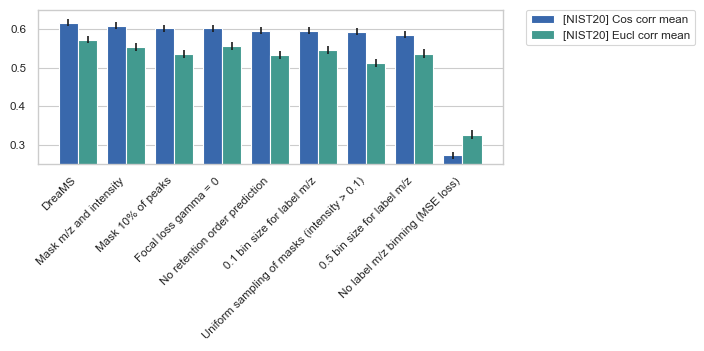

In [112]:
runs = {
    'mCupuG4hOQ_V7_store_probing': 'DreaMS',
    'vcdHmWpyDc_V7_mask_intens_strategy_intens_cutoff': 'Uniform sampling of masks (intensity > 0.1)',
    '22RenH0JIm_V7_mask_peak_hot': 'Mask m/z and intensity',
    'ch7T8ASU2W_V7_frac_masks_0.1': 'Mask 10% of peaks',
    # 'KIEVIhRdJ4_V7_frac_masks_0.5',
    '09EIhk2Uct_V7_focal_loss_gamma0': 'Focal loss gamma = 0',
    'W2SKjgbDZU_V7_ff_hot_mz_bin_size0.1': '0.1 bin size for label m/z',
    'k42X6o6jd7_V7_ff_hot_mz_bin_size0.5': '0.5 bin size for label m/z',
    '6ITo4X0KX1_V7_noRO_bs512': 'No retention order prediction',
    '2I7sqPRpMj_V7_mask_mz_': 'No label m/z binning (MSE loss)'
}
# df_plot = df_res[df_res['run_name'].apply(lambda x: 'msvn' in x or x == 'mCupuG4hOQ_V7_store_probing')]
df_plot = df_res[df_res['run_name'].isin(runs.keys())].copy()
df_plot['label'] = df_plot['run_name'].apply(lambda x: runs[x])
df_plot = df_plot.sort_values(by='value', ascending=True)
df_plot_mean = df_plot[df_plot['metric'].apply(lambda x: 'mean' in x)]
df_plot_mean['value'] = -df_plot_mean['value'].astype(float)
df_plot_std = df_plot[df_plot['metric'].apply(lambda x: 'std' in x)]
print(len(df_plot))
plt.figure(figsize=((6 / 9) * len(runs.keys()), 2))
ax = sns.barplot(data=df_plot_mean, x='label', y='value', hue='metric', palette=palette)
x_coords = [p.get_x() + 0.5 * p.get_width() for p in ax.patches]
y_coords = [p.get_height() for p in ax.patches]
ax.errorbar(x=x_coords[:-2], y=y_coords[:-2], yerr=df_plot_std["value"].tolist(), fmt="none", c="k")
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim(0.25, 0.65)
plt.ylabel('')
plt.xlabel('')
save_fig('ablations_losses.svg')
plt.show()

In [18]:
val_dfs[0]['[NIST20] Eucl corr mean']

0      -0.076187
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3377         NaN
3378         NaN
3379         NaN
3380         NaN
3381         NaN
Name: [NIST20] Eucl corr mean, Length: 3382, dtype: float64

In [13]:
cfgs['run_name']

0     vcdHmWpyDc_V7_mask_intens_strategy_intens_cutoff
1                            tXn8ldPI99_V7_no_pre-norm
2                                jv9DauY6o2_V7_90peaks
3                                tUa1syohyR_V7_30peaks
4                          22RenH0JIm_V7_mask_peak_hot
5                        JJzAitKlsq_V7_no_mz_shift_aug
6                         ch7T8ASU2W_V7_frac_masks_0.1
7                         KIEVIhRdJ4_V7_frac_masks_0.5
8             fVFCVnwnnW_V7_fourier_voronov_et_al_1024
9             WMV5O8XkWp_V7_fourier_voronov_et_al_5997
10                        SrJ0lMfZTj_V7_fourier_random
11                     w5wbTY7Zxf_V7_fourier_trainable
12                         mCupuG4hOQ_V7_store_probing
13                         Zcy7132Zvf_V7_no_graphormer
14                     jspT4ou4FS_V7_ff_fourier_depth2
15                amfsikv8U8_V7_d_fourier512_d_peak512
16                 W2SKjgbDZU_V7_ff_hot_mz_bin_size0.1
17                 k42X6o6jd7_V7_ff_hot_mz_bin_size0.5
18        